In [20]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
from pathlib import Path

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sarahm_44/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
# Read in CSV as dataframe
ryan_songs_df = pd.read_csv(
    Path("ryan_playlist_lyrics.csv")
)
ryan_songs_df.head()

,Unnamed: 0,name,artist,length,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,lyrics
0,0,Mama - Acoustic,Jonas Blue,192277,0.564,0.75900,0.564,0.364,0.000000,0.0839,-5.845,0.0631,86.538,Where should we run to?\nWe got the world in o...
1,1,Same as you,Hyolyn,223044,0.701,0.31400,0.701,0.519,0.000000,0.2070,-6.382,0.0516,89.977,그대와 같아 조금도 변한 게 없어\n여전히 그대 밖에 없어\n그대와 같아 누가 뭐래...
2,2,The Poet And The Pendulum,Nightwish,834720,0.309,0.00854,0.309,0.740,0.025800,0.1190,-5.917,0.0456,144.861,[I. White Lands Of Empathica]\n\nThe end\n\nTh...
3,3,Afire Love,Ed Sheeran,314280,0.552,0.46400,0.552,0.637,0.000016,0.1360,-6.568,0.0445,97.970,Things were all good yesterday\nAnd then the d...
4,4,Given Up,Linkin Park,189293,0.655,0.00117,0.655,0.885,0.000473,0.0448,-4.116,0.0438,100.088,Wake in a sweat again\nAnother day's been laid...


In [22]:
# Remove extra columns
ryan_songs_df = ryan_songs_df[['name', 'artist', 'lyrics']]
ryan_songs_df

,name,artist,lyrics
0,Mama - Acoustic,Jonas Blue,Where should we run to?\nWe got the world in o...
1,Same as you,Hyolyn,그대와 같아 조금도 변한 게 없어\n여전히 그대 밖에 없어\n그대와 같아 누가 뭐래...
2,The Poet And The Pendulum,Nightwish,[I. White Lands Of Empathica]\n\nThe end\n\nTh...
3,Afire Love,Ed Sheeran,Things were all good yesterday\nAnd then the d...
4,Given Up,Linkin Park,Wake in a sweat again\nAnother day's been laid...
5,All About Us,He Is We,"Take my hand, I'll teach you to dance\nI'll sp..."
6,Take It Back,Ed Sheeran,"I'm not a rapper, I'm a singer with a flow\nI'..."
7,Heart Afire,Defqwop,Nightmares creep while you and me repeat\nThis...
8,Mansae,SEVENTEEN,"Yeh alright\nSay the name Seventeen, yep\n내 맘 ..."
9,End Of All Hope,Nightwish,"It is the end of all hope\nTo lose the child, ..."


# 1. Sentiment Analysis

In [23]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [24]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "lyrics_compound": [],
    "lyrics_pos": [],
    "lyrics_neu": [],
    "lyrics_neg": [],
    "lyrics_sent": [],
}

In [25]:
# Describe the song lyrics and song title sentiment
# Get sentiment for the text and the title
for index, row in ryan_songs_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["name"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["lyrics"])
        text_sent["lyrics_compound"].append(text_sentiment["compound"])
        text_sent["lyrics_pos"].append(text_sentiment["pos"])
        text_sent["lyrics_neu"].append(text_sentiment["neu"])
        text_sent["lyrics_neg"].append(text_sentiment["neg"])
        text_sent["lyrics_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the Ryans songs DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
lyrics_sentiment_df = pd.DataFrame(text_sent)
ryan_songs_df = ryan_songs_df.join(title_sentiment_df).join(lyrics_sentiment_df)

ryan_songs_df.head()

,name,artist,lyrics,title_compound,title_pos,title_neu,title_neg,title_sent,lyrics_compound,lyrics_pos,lyrics_neu,lyrics_neg,lyrics_sent
0,Mama - Acoustic,Jonas Blue,Where should we run to?\nWe got the world in o...,0.0000,0.000,1.000,0.0,0,0.9925,0.153,0.814,0.033,1
1,Same as you,Hyolyn,그대와 같아 조금도 변한 게 없어\n여전히 그대 밖에 없어\n그대와 같아 누가 뭐래...,0.0000,0.000,1.000,0.0,0,0.9923,0.209,0.791,0.000,1
2,The Poet And The Pendulum,Nightwish,[I. White Lands Of Empathica]\n\nThe end\n\nTh...,0.0000,0.000,1.000,0.0,0,0.9988,0.258,0.611,0.131,1
3,Afire Love,Ed Sheeran,Things were all good yesterday\nAnd then the d...,0.6369,0.808,0.192,0.0,1,0.9998,0.357,0.604,0.039,1
4,Given Up,Linkin Park,Wake in a sweat again\nAnother day's been laid...,0.0000,0.000,1.000,0.0,0,-0.9965,0.088,0.578,0.334,-1


In [26]:
# Describe Ryans songs DataFrame
ryan_songs_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,lyrics_compound,lyrics_pos,lyrics_neu,lyrics_neg,lyrics_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,0.051285,0.086050,0.891600,0.022350,0.050000,0.342185,0.165900,0.71635,0.117750,0.400000
std,0.170086,0.220535,0.272739,0.099952,0.394034,0.874419,0.095012,0.10035,0.087833,0.940325
min,-0.051600,0.000000,0.132000,0.000000,-1.000000,-0.996500,0.017000,0.52600,0.000000,-1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,-0.731150,0.085750,0.66050,0.060750,-1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.972950,0.162000,0.72000,0.120500,1.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.994525,0.220250,0.76550,0.149000,1.000000
max,0.636900,0.808000,1.000000,0.447000,1.000000,0.999800,0.357000,0.93600,0.334000,1.000000


# 2. NLP

###   Tokenizer

In this section, use NLTK and Python to tokenize the text for each song's lyrics. This includes:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [27]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [28]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [29]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [30]:
# Create a new tokens column for Ryans songs titles
ryan_songs_df['title_tokens'] = ryan_songs_df['name'].apply(tokenizer)
ryan_songs_df.head()

,name,artist,lyrics,title_compound,title_pos,title_neu,title_neg,title_sent,lyrics_compound,lyrics_pos,lyrics_neu,lyrics_neg,lyrics_sent,title_tokens
0,Mama - Acoustic,Jonas Blue,Where should we run to?\nWe got the world in o...,0.0000,0.000,1.000,0.0,0,0.9925,0.153,0.814,0.033,1,"[mama, acoustic]"
1,Same as you,Hyolyn,그대와 같아 조금도 변한 게 없어\n여전히 그대 밖에 없어\n그대와 같아 누가 뭐래...,0.0000,0.000,1.000,0.0,0,0.9923,0.209,0.791,0.000,1,[]
2,The Poet And The Pendulum,Nightwish,[I. White Lands Of Empathica]\n\nThe end\n\nTh...,0.0000,0.000,1.000,0.0,0,0.9988,0.258,0.611,0.131,1,"[poet, pendulum]"
3,Afire Love,Ed Sheeran,Things were all good yesterday\nAnd then the d...,0.6369,0.808,0.192,0.0,1,0.9998,0.357,0.604,0.039,1,"[afire, love]"
4,Given Up,Linkin Park,Wake in a sweat again\nAnother day's been laid...,0.0000,0.000,1.000,0.0,0,-0.9965,0.088,0.578,0.334,-1,[given]


In [31]:
# Create a new tokens column for Ryans songs lyrics
ryan_songs_df['lyrics_tokens'] = ryan_songs_df['lyrics'].apply(tokenizer)
ryan_songs_df.head()

,name,artist,lyrics,title_compound,title_pos,title_neu,title_neg,title_sent,lyrics_compound,lyrics_pos,lyrics_neu,lyrics_neg,lyrics_sent,title_tokens,lyrics_tokens
0,Mama - Acoustic,Jonas Blue,Where should we run to?\nWe got the world in o...,0.0000,0.000,1.000,0.0,0,0.9925,0.153,0.814,0.033,1,"[mama, acoustic]","[run, towe, got, world, hand, ready, playthey,..."
1,Same as you,Hyolyn,그대와 같아 조금도 변한 게 없어\n여전히 그대 밖에 없어\n그대와 같아 누가 뭐래...,0.0000,0.000,1.000,0.0,0,0.9923,0.209,0.791,0.000,1,[],"[since, ive, loving, love, forever, since, ive..."
2,The Poet And The Pendulum,Nightwish,[I. White Lands Of Empathica]\n\nThe end\n\nTh...,0.0000,0.000,1.000,0.0,0,0.9988,0.258,0.611,0.131,1,"[poet, pendulum]","[white, lands, empathicathe, endthe, songwrite..."
3,Afire Love,Ed Sheeran,Things were all good yesterday\nAnd then the d...,0.6369,0.808,0.192,0.0,1,0.9998,0.357,0.604,0.039,1,"[afire, love]","[things, good, yesterdayand, devil, took, memo..."
4,Given Up,Linkin Park,Wake in a sweat again\nAnother day's been laid...,0.0000,0.000,1.000,0.0,0,-0.9965,0.088,0.578,0.334,-1,[given],"[wake, sweat, againanother, day, laid, wastein..."


### NGrams and Frequency Analysis

Look at the word frequency and ngrams for song lyrics.

1. List the top 10 words for Ryan's songs. 
2. Use NLTK to produce the n-grams for N = 4. 

In [32]:
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
lemmatizer = WordNetLemmatizer()

In [33]:
# Function token_count generates the top 10 words for text
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [34]:
# Use token_count to get the top 10 words for Ryan's song titles
bigstr = []
for tokens in ryan_songs_df.title_tokens:
    bigstr += tokens
title_token_count = token_count(bigstr)
title_token_count

[('afire', 2),
 ('angels', 2),
 ('mama', 1),
 ('acoustic', 1),
 ('poet', 1),
 ('pendulum', 1),
 ('love', 1),
 ('given', 1),
 ('us', 1),
 ('take', 1)]

In [35]:
# Use token_count to get the top 10 words for Ryan's song lyrics
bigstr = []
for tokens in ryan_songs_df.lyrics_tokens:
    bigstr += tokens
lyrics_token_count = token_count(bigstr)
lyrics_token_count

[('la', 63),
 ('oh', 61),
 ('im', 43),
 ('like', 40),
 ('love', 36),
 ('one', 31),
 ('na', 22),
 ('back', 22),
 ('wa', 22),
 ('dont', 21)]

In [36]:
# Generate the song lyric N-grams where N=4
songs_bigram_counts = [Counter(ngrams(tokens, n=4)) for tokens in ryan_songs_df.lyrics_tokens]
dict(songs_bigram_counts[0].most_common(10))

{('wan', 'na', 'wake', 'one'): 4,
 ('na', 'wake', 'one', 'day'): 4,
 ('mama', 'mama', 'heywe', 'aint'): 4,
 ('mama', 'heywe', 'aint', 'coming'): 4,
 ('heywe', 'aint', 'coming', 'home'): 4,
 ('mama', 'dont', 'stress', 'mindwe'): 3,
 ('dont', 'stress', 'mindwe', 'aint'): 3,
 ('stress', 'mindwe', 'aint', 'coming'): 3,
 ('mindwe', 'aint', 'coming', 'home'): 3,
 ('mama', 'gon', 'na', 'alrightdry'): 3}

### Word Clouds

Generate a word cloud for the lyrics for all of Ryan's favourite songs.

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

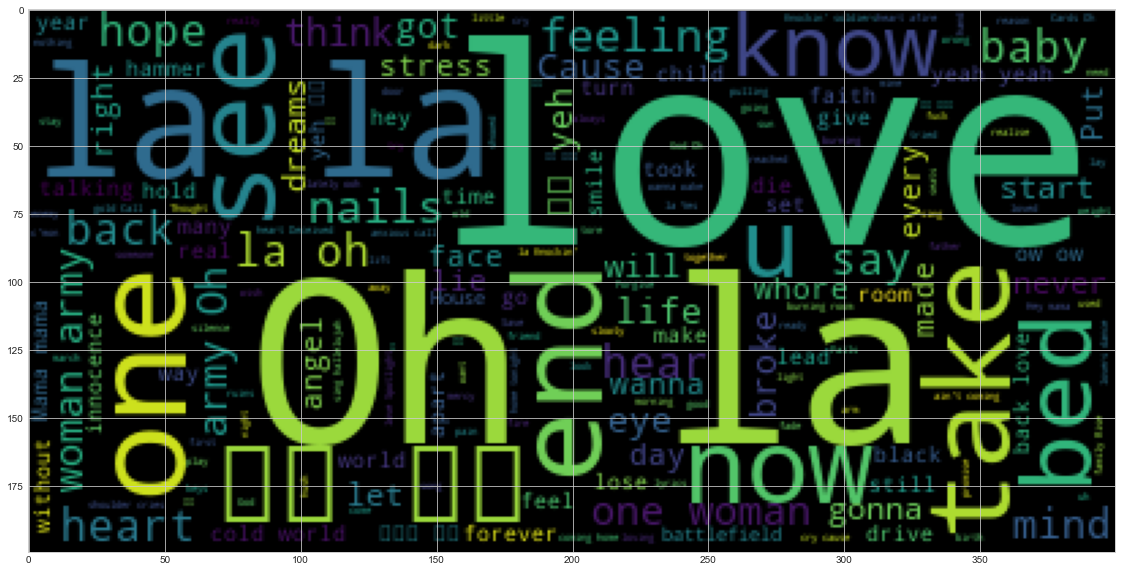

In [38]:
# Generate the song lyrics word cloud
lyrics_text = ' '.join(ryan_songs_df.lyrics)
wc = WordCloud().generate(lyrics_text)
plt.imshow(wc)